# 5.10、1948-1981年美國女性月度失業率序列
## data1.17.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.tsa.api as smt
import statsmodels.tsa.arima.model as smt2
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test

## statsmodels自帶的畫ACF的函數

In [2]:
def drawts(y,pname,lags=None):
    ##draw ax
    fig = plt.figure(figsize=(10,8))
    ts_ax=plt.subplot2grid((2,2),(0,0),colspan=2)
    acf_ax=plt.subplot2grid((2,2),(1,0))
    pacf_ax=plt.subplot2grid((2,2),(1,1))
    ##draw plot
    ts_ax.plot(y,'*-')
    ts_ax.set_title('Time Series Analysis Plots')
    smt.graphics.plot_acf(y,lags=lags,ax=acf_ax,alpha=0.05) ##2sigma
    smt.graphics.plot_pacf(y,lags=lags,ax=pacf_ax,alpha=0.05)  ##2sigma
    #plt.savefig('%s.jpg'%pname,dpi=256)
    plt.show()
    plt.close()## statsmodels自帶的LB test## statsmodels自帶的畫ACF的函數

## statsmodels自帶的LB test

In [3]:
def purerandtest(y):
    a,b=lb_test(y,lags=None,boxpierce=False)
    LB_purerand=pd.DataFrame(np.c_[a,b],columns=['LB','Pvalue'])
    LB_purerand['lags']=range(1,len(a)+1)
    print('----time series: LB pure randomness test----')
    print(LB_purerand)

## Green函數

In [4]:
def getgi(phi,theta,n=20):
    ## calculate G:  phi=phi,    theta=theta
    ## calculate I:  phi=theta,  theta=phi
    gi=np.zeros((n))
    gi[0]=1
    for j in range(1,n):
        gvalue=0
        for k in range(1,j+1):
            if k>len(phi)-1:
                phik=0
            else:
                phik=phi[k]
            gvalue=gvalue+phik*gi[j-k]
        if j>len(theta)-1:
            thetai=0
        else:
            thetai=theta[j]
        gi[j]=gvalue-thetai
    return gi

## 開始分析

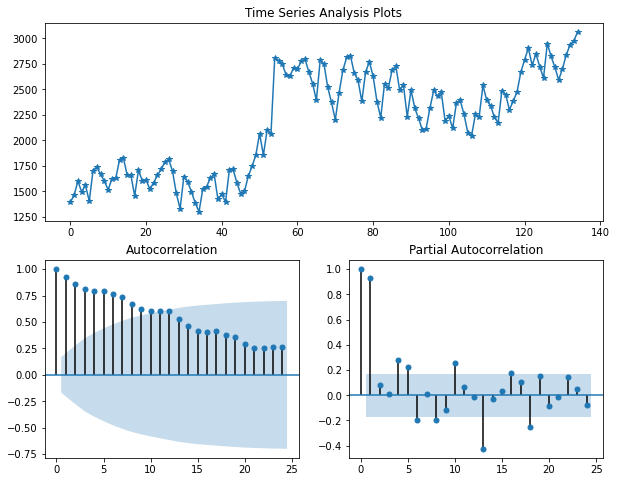

In [12]:
##read data
dfname='data1.17'
y=pd.read_csv('%s.csv'%dfname,header=None)
y.iloc[:,0]=y.iloc[:,0].astype('float')
y=y.values[:,0]
drawts(y,dfname,24)

## 12步&1階差分

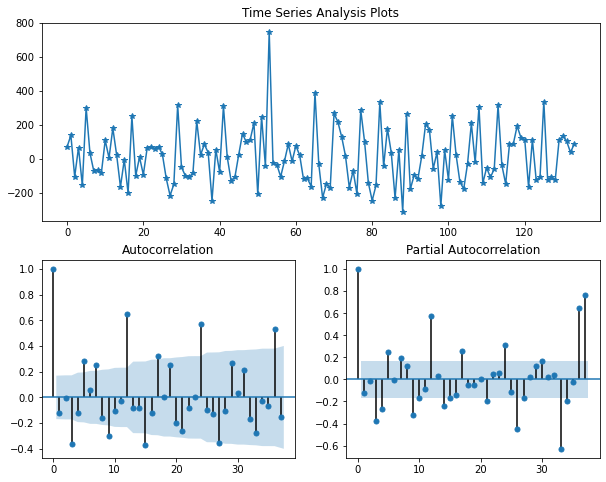

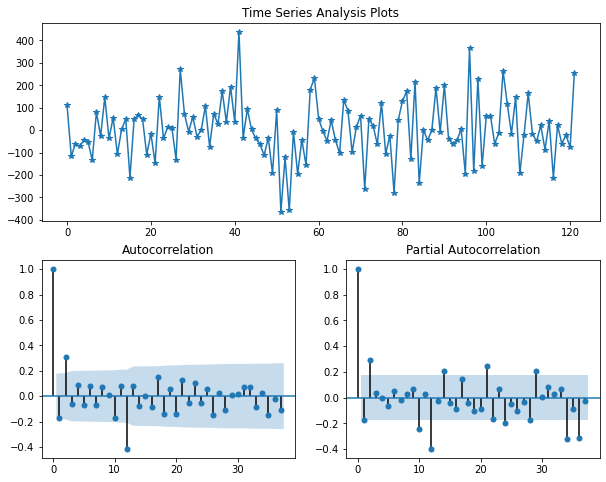

In [19]:
yd=y[1:]-y[:-1]
drawts(yd,dfname,37)
yd=yd[12:]-yd[:-12]
drawts(yd,dfname,37)

## 白噪聲檢驗

In [20]:
purerandtest(yd)

----time series: LB pure randomness test----
           LB    Pvalue  lags
0    3.830511  0.050328     1
1   15.737935  0.000382     2
2   16.209951  0.001027     3
3   17.143962  0.001812     4
4   17.814836  0.003188     5
5   18.651947  0.004794     6
6   19.290768  0.007324     7
7   19.927859  0.010612     8
8   19.948316  0.018234     9
9   23.950954  0.007732    10
10  24.897424  0.009437    11
11  48.504889  0.000003    12
12  49.472148  0.000004    13
13  50.274611  0.000005    14
14  50.276160  0.000011    15
15  51.269615  0.000014    16
16  54.713851  0.000008    17
17  57.680685  0.000005    18
18  58.193687  0.000007    19
19  60.958203  0.000005    20
20  63.476725  0.000004    21
21  63.963608  0.000006    22
22  65.663530  0.000006    23
23  66.121694  0.000008    24
24  66.620362  0.000012    25
25  70.171570  0.000006    26
26  70.249340  0.000010    27
27  72.233825  0.000009    28
28  72.252934  0.000015    29
29  72.300796  0.000024    30
30  73.181823  0.000029  

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:494: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


## ARIMA(p,d,q)建模參數估計

In [68]:
##ARIMA
arma10=smt2.ARIMA(y,order=(1,1,1),seasonal_order=(0,1,1,12),trend='n').fit() #trend=n,c,t,ct
print('----fitting summary----')
print(arma10.summary())

----fitting summary----
                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                  135
Model:             ARIMA(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -740.870
Date:                          Sun, 14 Nov 2021   AIC                           1489.740
Time:                                  16:30:46   BIC                           1500.956
Sample:                                       0   HQIC                          1494.295
                                          - 135                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7794      0.216     -3.613      0.000      -1.202      -0.357
ma.L1          0.6138      

## 殘差白噪聲檢驗/模型顯著性檢驗

In [69]:
resid=arma10.resid
print('\n----residual pure randomness test')
purerandtest(resid)


----residual pure randomness test
----time series: LB pure randomness test----
           LB    Pvalue  lags
0    0.000525  0.981713     1
1    2.412329  0.299343     2
2    2.511486  0.473219     3
3    2.676642  0.613308     4
4    2.688775  0.747835     5
5    3.476590  0.747082     6
6    4.185604  0.758169     7
7    4.688841  0.790256     8
8    4.695778  0.859981     9
9    6.254770  0.793424    10
10   6.746579  0.819219    11
11  15.598602  0.210320    12
12  16.001807  0.249032    13
13  16.038800  0.311011    14
14  17.648709  0.281584    15
15  17.652455  0.344637    16
16  17.654034  0.410974    17
17  17.929659  0.460296    18
18  18.231814  0.507007    19
19  18.302417  0.567494    20
20  18.356855  0.626323    21
21  18.491171  0.676502    22
22  18.509410  0.729302    23
23  18.571429  0.774442    24
24  18.572975  0.817123    25
25  20.178012  0.783046    26
26  20.345263  0.815959    27
27  24.116606  0.675366    28
28  24.117327  0.723126    29
29  24.403864  0.753

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:494: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


## 擬合

In [70]:
myalpha=0.05
mypred=arma10.get_prediction(start=0,end=len(y)-1+50,dynamic=False)  ##if True, start >0
print('\n----fitted confidence interval: %d %%'%((1-myalpha)*100))
print(mypred.summary_frame(alpha=myalpha))

#mypred.predicted_mean
#mypred.se_mean


----fitted confidence interval: 95 %
y           mean      mean_se  mean_ci_lower  mean_ci_upper
0       0.000000  1420.702910   -2784.526535    2784.526535
1    1390.530061  1009.153314    -587.374090    3368.434211
2    1464.615634  1009.148441    -513.278966    3442.510235
3    1599.328156  1009.145716    -378.561102    3577.217414
4    1496.573942  1009.144270    -481.312483    3474.460367
..           ...          ...            ...            ...
180  3476.101931   668.162164    2166.528153    4785.675709
181  3584.047041   676.620409    2257.895408    4910.198674
182  3610.687944   684.961538    2268.187999    4953.187888
183  3463.732089   694.556354    2102.426650    4825.037527
184  3449.696485   703.789656    2070.294106    4829.098864

[185 rows x 4 columns]


## 畫圖

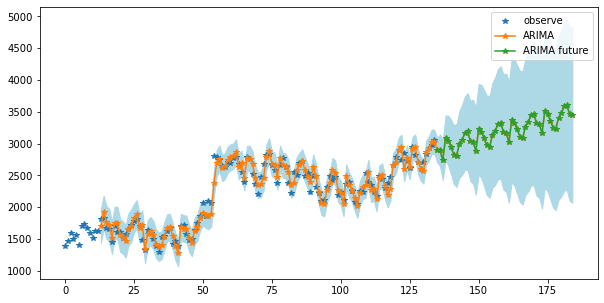

In [71]:
startdraw=13
plt.figure(figsize=(10,5))
plt.plot(y,'*',label='observe')
plt.plot(np.arange(startdraw,mypred.predicted_mean.shape[0]),mypred.predicted_mean[startdraw:],'-*',label='ARIMA')
plt.plot(np.arange(len(y),mypred.predicted_mean.shape[0]),mypred.predicted_mean[len(y):],'-*',label='ARIMA future')

plt.fill_between(np.arange(startdraw,mypred.predicted_mean.shape[0]),
                 mypred.conf_int(0.05)[startdraw:,0],
                 mypred.conf_int(0.05)[startdraw:,1],
                 color='lightblue')
plt.legend()
plt.show()